### Vehicle Loan Default Prediction
Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default.<br>

A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets:<br>

* Loanee Information (Demographic data like age, income, Identity proof etc.)
* Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.)
* Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)<br>

Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

In [208]:
import pandas as pd
import numpy as np
import datetime as dt
import re
from sklearn.preprocessing import LabelEncoder
import warnings

pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option("display.max_columns",75)

warnings.filterwarnings('ignore')

lb=LabelEncoder()


%matplotlib inline

In [2]:
Target = 'loan_default'
ID = 'UniqueID'

In [202]:
def string_numeric(string = None):
    a = re.findall(r'\d+',string)
    return (int(a[0])*12+int(a[1]))

In [229]:
train = pd.read_csv('./train/train.csv',index_col=False)

train.fillna('others',inplace=True)

train['LoanAllotment_variation'] = train.apply(lambda x: np.round((x['asset_cost']-x['disbursed_amount'])/x['asset_cost'],3), axis =1)

train['Date.of.Birth'] = train.apply(lambda x: dt.datetime.strptime(x['Date.of.Birth'],'%d-%m-%y').date(), axis =1)

train['DisbursalDate'] = train.apply(lambda x: dt.datetime.strptime(x['DisbursalDate'],'%d-%m-%y').date(), axis =1)

train['Age'] = (train['DisbursalDate'] - train['Date.of.Birth']).astype('<m8[Y]')

train['Age'] = train['Age'].clip(0,np.inf)

train['AVERAGE.ACCT.AGE'] = train.apply(lambda x: string_numeric(string = x['AVERAGE.ACCT.AGE']), axis =1)

train['CREDIT.HISTORY.LENGTH'] = train.apply(lambda x: string_numeric(string = x['CREDIT.HISTORY.LENGTH']), axis =1)

train['Employment.Type'] = lb.fit_transform(train['Employment.Type'])

train['Total_Active_Loan'] = train['PRI.ACTIVE.ACCTS'] + train['SEC.ACTIVE.ACCTS']

train['Total_Default_loan'] = train['PRI.OVERDUE.ACCTS'] + train['PRI.OVERDUE.ACCTS']

train['Total_Amount_Loan'] = train['PRI.CURRENT.BALANCE'] + train['SEC.CURRENT.BALANCE']



train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,LoanAllotment_variation,Age,Total_Active_Loan,Total_Default_loan,Total_Amount_Loan
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.13,34.00,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,1,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,0.28,33.00,1,2,27600
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.13,32.00,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,1,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,0.13,24.00,0,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,1,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.13,40.00,0,0,0


In [230]:
test = pd.read_csv('./test.csv',index_col=False)

test.fillna('others',inplace=True)

test['LoanAllotment_variation'] = test.apply(lambda x: np.round((x['asset_cost']-x['disbursed_amount'])/x['asset_cost'],3), axis =1)

test['Date.of.Birth'] = test.apply(lambda x: dt.datetime.strptime(x['Date.of.Birth'],'%d-%m-%y').date(), axis =1)

test['DisbursalDate'] = test.apply(lambda x: dt.datetime.strptime(x['DisbursalDate'],'%d-%m-%y').date(), axis =1)

test['Age'] = (test['DisbursalDate'] - test['Date.of.Birth']).astype('<m8[Y]')

test['Age'] = test['Age'].clip(0,np.inf)

test['AVERAGE.ACCT.AGE'] = test.apply(lambda x: string_numeric(string = x['AVERAGE.ACCT.AGE']), axis =1)

test['CREDIT.HISTORY.LENGTH'] = test.apply(lambda x: string_numeric(string = x['CREDIT.HISTORY.LENGTH']), axis =1)

test['Employment.Type'] = lb.fit_transform(test['Employment.Type'])

test['Total_Active_Loan'] = test['PRI.ACTIVE.ACCTS'] + test['SEC.ACTIVE.ACCTS']

test['Total_Default_loan'] = test['PRI.OVERDUE.ACCTS'] + test['PRI.OVERDUE.ACCTS']

test['Total_Amount_Loan'] = test['PRI.CURRENT.BALANCE'] + test['SEC.CURRENT.BALANCE']

test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,LoanAllotment_variation,Age,Total_Active_Loan,Total_Default_loan,Total_Amount_Loan
0,655269,53478,63558,86.54,67,22807,45,1497,1974-01-01,0,2018-11-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,44.00,0,0,0
1,723482,55513,63163,89.45,67,22807,45,1497,1985-05-20,1,2018-11-20,6,1998,1,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,8,12,1,0.12,33.00,1,0,43898
2,758529,65282,84320,79.93,78,23135,86,2071,1995-10-14,0,2018-11-29,4,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.23,23.00,0,0,0
3,763449,46905,63896,76.58,78,17014,45,2070,1973-06-01,1,2018-11-29,4,1646,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,29,29,0,0.27,45.00,1,2,132480
4,708663,51428,63896,86.08,78,17014,45,2069,1972-06-01,0,2018-11-17,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.20,46.00,0,0,0


Training Dataset target variable distribution:
0                  78.29
1                  21.71
Name: loan_default, dtype: float64


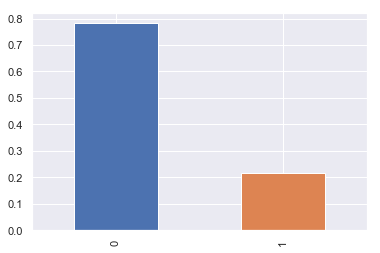

In [87]:
# Unbalance 
print("Training Dataset target variable distribution:")
print(train.loan_default.value_counts(normalize=True)*100)

train['loan_default'].value_counts(normalize=True).plot(kind='bar',figsize=(6,4))

In [88]:
print('Total No. of columns:',len(train.columns))
print('The Columns name are:')
print(list(train.columns))

Total No. of columns: 42
The Columns name are:
['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default', 'Age']


In [89]:
#To check whether any duplicate UniqueID exists or not
assert len(train.UniqueID.unique()) == train.UniqueID.shape[0]
print("No duplicate uniqueId Exists")

No duplicate uniqueId Exists


In [91]:
print("Missing Value Check:")
print(train.isnull().sum(axis=0))

Missing Value Check:
UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                   

In [101]:
float_column = list(train.select_dtypes(include='float64').columns)

In [94]:
categorical_column = list(train.select_dtypes(include='object').columns)

In [95]:
numerical_column = list(train.select_dtypes(include='int64').columns)
numerical_column = [ i for i in numerical_column if i not in [Target,ID]]

In [103]:
train['LoanAllotment_variation'].corr(train['ltv'])

## They are highly negative correlated

-0.9953368221289273

In [ ]:
column_definition = pd.read_excel('./train/Data Dictionary.xlsx',index_col=False)

In [ ]:
column_definition.iloc[28]

In [107]:
# Unbalance 
train.loan_default.value_counts(normalize=True)*100

#Comment: Data is not heavily unbalanced

0                  78.29
1                  21.71
Name: loan_default, dtype: float64

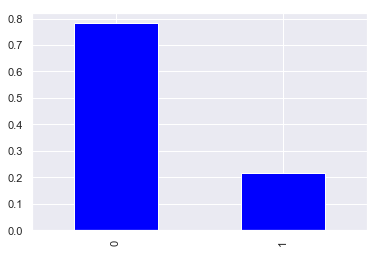

In [108]:
train['loan_default'].value_counts(normalize=True).plot(kind='bar',figsize=(6,4),color='blue')

In [109]:
train['disbursed_amount'].corr(train['asset_cost'])

0.75266830990674

## Baseline Modeling

In [231]:
from sklearn.model_selection import train_test_split
#train = train[train.Age!=0]
X_train, X_test, y_train, y_test = train_test_split(np.array(train[['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT',\
                                                    'SEC.INSTAL.AMT','Current_pincode_ID','Age','Employment.Type','branch_id',\
                                                    'CREDIT.HISTORY.LENGTH','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE.ACCT.AGE',\
                                                    'NEW.ACCTS.IN.LAST.SIX.MONTHS','Total_Active_Loan',\
                                                    'Total_Default_loan','Total_Amount_Loan']]), \
                                                    np.array(train[Target]), test_size=0.30,\
                                                    stratify=train[Target],random_state=0)
eval_set=[(X_test, y_test)]

In [232]:
X_train

array([[4.68490e+04, 5.86720e+04, 8.26600e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.42130e+04, 1.01152e+05, 6.42600e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.18030e+04, 7.32430e+04, 7.30400e+01, ..., 2.00000e+00,
        2.00000e+00, 2.48261e+05],
       ...,
       [7.67510e+04, 1.07827e+05, 7.32700e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.33220e+04, 7.80630e+04, 7.05400e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.45740e+04, 6.65300e+04, 3.75800e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [233]:
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = dt.datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(dt.datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))


print(clf.feature_importances_)


Initializing xgboost.sklearn.XGBClassifier and starting training...
[0]	validation_0-auc:0.624657
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.628618
[2]	validation_0-auc:0.631285
[3]	validation_0-auc:0.632924
[4]	validation_0-auc:0.635294
[5]	validation_0-auc:0.636269
[6]	validation_0-auc:0.637482
[7]	validation_0-auc:0.638489
[8]	validation_0-auc:0.638977
[9]	validation_0-auc:0.639578
[10]	validation_0-auc:0.639878
[11]	validation_0-auc:0.640304
[12]	validation_0-auc:0.641613
[13]	validation_0-auc:0.64227
[14]	validation_0-auc:0.642387
[15]	validation_0-auc:0.64281
[16]	validation_0-auc:0.643737
[17]	validation_0-auc:0.644293
[18]	validation_0-auc:0.644874
[19]	validation_0-auc:0.645459
[20]	validation_0-auc:0.6456
[21]	validation_0-auc:0.646053
[22]	validation_0-auc:0.646567
[23]	validation_0-auc:0.646936
[24]	validation_0-auc:0.647115
[25]	validation_0-auc:0.647145
[26]	validation_0-auc:0.64749
[27]	validation_0-auc:0.647702
[28]	validation

In [234]:
test['loan_default'] = (clf.predict_proba(np.array(test[['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT',\
                                                    'SEC.INSTAL.AMT','Current_pincode_ID','Age','Employment.Type','branch_id',\
                                                    'CREDIT.HISTORY.LENGTH','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE.ACCT.AGE',\
                                                    'NEW.ACCTS.IN.LAST.SIX.MONTHS','Total_Active_Loan',\
                                                    'Total_Default_loan','Total_Amount_Loan']])))[:,0]

In [235]:
test[['UniqueID','loan_default']].to_csv('./submission_2.csv',index=False)

In [236]:
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,LoanAllotment_variation,Age,Total_Active_Loan,Total_Default_loan,Total_Amount_Loan,loan_default
0,655269,53478,63558,86.54,67,22807,45,1497,1974-01-01,0,2018-11-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,44.00,0,0,0,0.73
1,723482,55513,63163,89.45,67,22807,45,1497,1985-05-20,1,2018-11-20,6,1998,1,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,8,12,1,0.12,33.00,1,0,43898,0.76
2,758529,65282,84320,79.93,78,23135,86,2071,1995-10-14,0,2018-11-29,4,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.23,23.00,0,0,0,0.67
3,763449,46905,63896,76.58,78,17014,45,2070,1973-06-01,1,2018-11-29,4,1646,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,29,29,0,0.27,45.00,1,2,132480,0.68
4,708663,51428,63896,86.08,78,17014,45,2069,1972-06-01,0,2018-11-17,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.20,46.00,0,0,0,0.70


### Each column analysis

In [ ]:
train.head()

|  Column Name | Comment  |  
|---|---|
|UniqueID   | unique identifier  |
|disbursed_amount | Need to scale this feature |
|asset_cost  |  Need to scale this too |

In [ ]:
print("Data type of each column:")
print(train.dtypes)

In [ ]:
print("Number of missing values in each column:")
print(train.isnull().sum())

#Note: There is only one column with missing value i.e. Employment.Type.
#We can't remove missing values as this column in test dataset also contains missing value 

In [ ]:
import missingno as msno

msno.matrix(train[['Employment.Type']])

# Although the NAN's are scattereed but their are instance where they are contiguous

In [ ]:
train.fillna('others',inplace=True)

In [ ]:
train['PRI.OVERDUE.ACCTS'].plot.line()

In [ ]:
train[train['PRI.OVERDUE.ACCTS']==0][Target].value_counts()

In [ ]:
train.describe()

In [30]:
train['LoanAllotment_variation'] = train.apply(lambda x: np.round((x['asset_cost']-x['disbursed_amount'])/x['asset_cost'],3), axis =1)
                                               

In [12]:
train.groupby(Target, as_index=False)['LoanAllotment_variation'].mean()

,loan_default,LoanAllotment_variation
0,0,21896.335017
1,1,20107.702792


In [17]:
train.groupby(Target, as_index=False)['LoanAllotment_variation'].mean()

,loan_default,LoanAllotment_variation
0,0,0.281270
1,1,0.254316


In [18]:
train.groupby(Target, as_index=False)['LoanAllotment_variation'].median()

,loan_default,LoanAllotment_variation
0,0,0.263364
1,1,0.235335


In [16]:
np.round((58400-50578)/58400,3)

0.134

In [22]:
train.groupby(Target, as_index=False)['ltv'].mean()

,loan_default,ltv
0,0,74.154093
1,1,76.883322


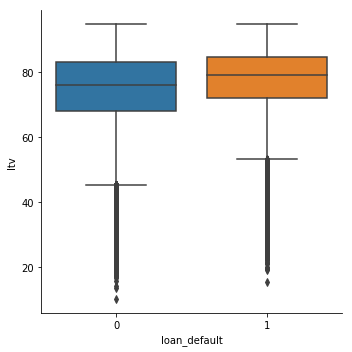

In [24]:
import seaborn as sns
sns.catplot(x=Target, y="ltv", data=train,kind="box")

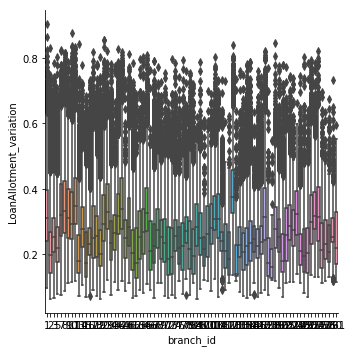

In [27]:
sns.catplot(x='branch_id', y="LoanAllotment_variation", data=train,kind="box")

In [56]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,LoanAllotment_variation
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.13
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,0.28
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.13
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,0.13
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0.13


In [191]:
len(train.branch_id.unique())

82

In [149]:
column_to_drop = ['branch_id','supplier_id','manufacturer_id','Employee_code_ID','MobileNo_Avl_Flag',\
                 'Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag',\
                 '']

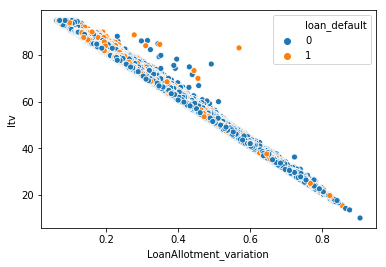

In [35]:
sns.scatterplot(x="LoanAllotment_variation",y='ltv',hue=Target,data=train)

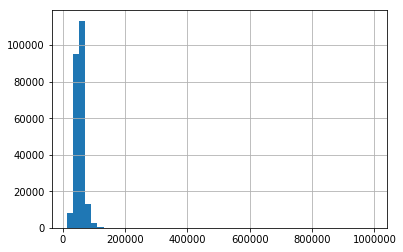

In [44]:
train['disbursed_amount'].hist(bins=50)

#sns.plt.ylim(0, 20)
#sns.plt.xlim(0, None)

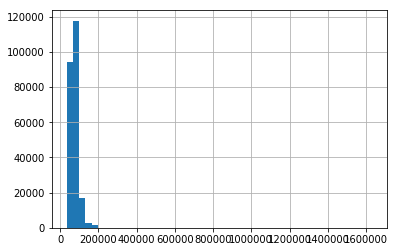

In [47]:
train['asset_cost'].hist(bins=50)


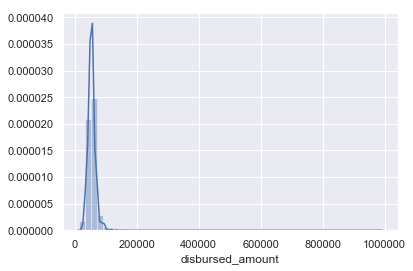

In [48]:
sns.set()
x = train['disbursed_amount']
ax = sns.distplot(x)

In [55]:
train['disbursed_amount'].describe()

count             233,154.00
mean               54,356.99
std                12,971.31
min                13,320.00
25%                47,145.00
50%                53,803.00
75%                60,413.00
max               990,572.00
Name: disbursed_amount, dtype: float64

In [54]:
train['asset_cost'].describe()

count             233,154.00
mean               75,865.07
std                18,944.78
min                37,000.00
25%                65,717.00
50%                70,946.00
75%                79,201.75
max             1,628,992.00
Name: asset_cost, dtype: float64

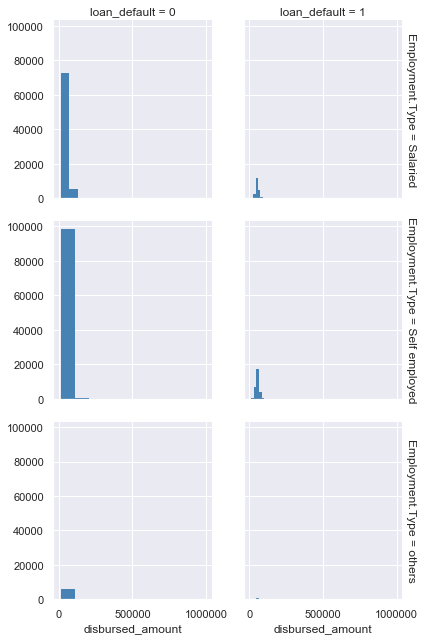

In [63]:

# Facet plot : observe how loan_status differ by their grade
# turns out: there is almost no F,G grade loaners, 
import matplotlib.pyplot as plt
g = sns.FacetGrid(train, row='Employment.Type', col=Target, margin_titles=True)
g.map(plt.hist, 'disbursed_amount', color='steelblue', lw=0)

In [61]:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [129]:
train.groupby(Target, as_index=False)['Age'].std()

,loan_default,Age
0,0.00,11.89
1,1.00,11.32


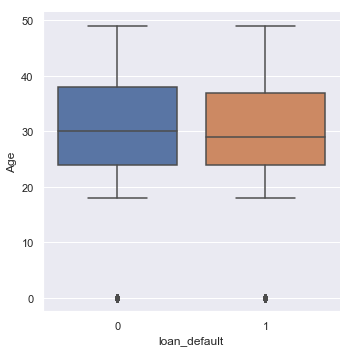

In [128]:
sns.catplot(x=Target, y="Age", data=train,kind="box")

In [132]:
test.Age.describe()

count             112,392.00
mean                   29.53
std                    11.99
min                     0.00
25%                    24.00
50%                    30.00
75%                    38.00
max                    49.00
Name: Age, dtype: float64

In [148]:
train.PAN_flag.value_counts()

0    215533
1     17621
Name: PAN_flag, dtype: int64

In [142]:
train.groupby('PAN_flag', as_index = False)['disbursed_amount'].mean()

,PAN_flag,disbursed_amount
0,0,"54,303.25"
1,1,"55,014.35"


In [146]:
train[train.PAN_flag==1][Target].value_counts()

0    13744
1     3877
Name: loan_default, dtype: int64

In [147]:
train[train.PAN_flag==0][Target].value_counts()

0    168799
1     46734
Name: loan_default, dtype: int64

In [153]:
df = train[['Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag']]

In [159]:
df['verfication'] = df.sum(axis=1)
df[df.verfication==0]

#All loaners are verified by some mean

,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,verfication


In [169]:
train['Employee_code_ID'].value_counts()

2546    628
620     502
255     494
130     408
2153    401
956     369
184     361
1466    355
1494    352
64      351
734     348
751     343
908     341
738     339
2048    335
2058    334
484     334
237     324
1421    314
1439    309
845     309
611     305
394     303
242     299
1007    286
628     285
2601    285
233     282
1266    278
3132    278
       ... 
157       1
3101      1
115       1
3792      1
3749      1
3715      1
3795      1
3790      1
770       1
3780      1
3794      1
3747      1
2674      1
3772      1
3788      1
3462      1
3755      1
3595      1
3742      1
3764      1
89        1
3743      1
3466      1
2463      1
2166      1
241       1
3330      1
3793      1
3779      1
3746      1
Name: Employee_code_ID, Length: 3270, dtype: int64

In [218]:
len(train['State_ID'].unique())

22

In [219]:
train['State_ID'].value_counts()

4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: State_ID, dtype: int64